__Background:__ Markov chains could be used to model a plethora of phenomena that happen in our world. The only assumption that we would have to accept is the fact that what we are trying to model depends only on the last step, and not on all previous steps (the whole history). 

For example, Sahin and Sen (2001) model hourly wind speeds in a NW part of Turkey as a Markov chain ${(X_n)}_{n\in \mathbb{N}}$ with 7 states representing different wind speed levels. Since in Python arrays are indexed starting from $0$, let us consider the states to be $S=\{0,1,2,3,4,5,6 \}$, with $0$ representing the lowest wind speed level.

As usual, we start with loading some packages:

In [1]:
import numpy as np 
from numpy import linalg 
import scipy.linalg

### Part a (2 Points)

Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>. Compute $P^{7}$ and list its rows. 

In [2]:
P = np.array([[0.756,0.113,0.129,0.002,0,0,0],\
            [0.174,0.821,0.004,0.001,0,0,0],\
            [0.141,0.001,0.776,0.082,0,0,0],\
            [0.003,0,0.192,0.753,0.052,0,0],\
            [0,0,0.002,0.227,0.735,0.036,0],\
            [0,0,0,0.007,0.367,0.604,0.022],\
            [0,0,0,0,0.053,0.158,0.789]])

In [3]:
P7 = linalg.matrix_power(P,7)

In [4]:
print(P7)

[[3.88182154e-01 2.51905218e-01 2.78526403e-01 7.35440384e-02
  7.52157116e-03 3.14415541e-04 6.20064088e-06]
 [3.90899834e-01 4.01123054e-01 1.73362747e-01 3.21628973e-02
  2.37176779e-03 7.83745082e-05 1.32548575e-06]
 [3.00702106e-01 1.17049352e-01 3.90973627e-01 1.63754184e-01
  2.59246983e-02 1.54837844e-03 4.76542058e-05]
 [1.81054947e-01 4.53387029e-02 3.81778491e-01 2.98851434e-01
  8.48801487e-02 7.68398104e-03 4.12295300e-04]
 [8.19244208e-02 1.33620772e-02 2.68559006e-01 3.72565981e-01
  2.27965343e-01 3.22631333e-02 3.36003854e-03]
 [3.69181923e-02 4.14369253e-03 1.71543120e-01 3.53122996e-01
  3.35345550e-01 7.67724309e-02 2.21540186e-02]
 [1.11758879e-02 9.64858223e-04 6.91427100e-02 2.08955182e-01
  3.35675738e-01 1.67200772e-01 2.06884851e-01]]


### Part b (4 points)
Assume that the wind speed in State $i$ is $10 \cdot i$ Miles/hr. So there is no wind in state 0 and 60 M/hr wind in state 6. Given that there is no wind today, find the **expected wind speed** in 1 week's time. 

In [5]:
state_space = [0,1,2,3,4,5,6]
speed_space = [10*i for i in state_space]

In [6]:
# P(X7 = k | X0 = 0) = ?
# = P7 row 0, column k
print(P7[0])

[3.88182154e-01 2.51905218e-01 2.78526403e-01 7.35440384e-02
 7.52157116e-03 3.14415541e-04 6.20064088e-06]


In [7]:
# P(X7 = k) = P7[0][k] for k element in speed_space

In [8]:
def expected_value(x, px):
    return float(np.matmul(np.array([x]), np.array([px]).T))

In [9]:
expected_value(speed_space, P7[0])

10.612857045656652

### Part c (4 Points)

We fix $X_0 = 0$ (no wind today) and wish to compute $H_n := \mathbb{P}(X_n = 6 | X_0 = 0)$ which is the probability that there will be strong wind $n$ days from now. Using a <tt>for</tt> loop, evaluate $H_n$ for $n=1,2,\ldots,100$, i.e for 1,2, and up to 100 days into the future.

Create a plot showing $H_n$ as a function of $n$. Summarize what you observe.

In [10]:
# Hn := P(Xn = 6 | X0 = 0)
all_hn = []
for i in range(1,101):
    P_power = linalg.matrix_power(P,i)
    Hn = P_power[0][6]
    all_hn.append(Hn)

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Probability of Strong Wind n Days from Now')

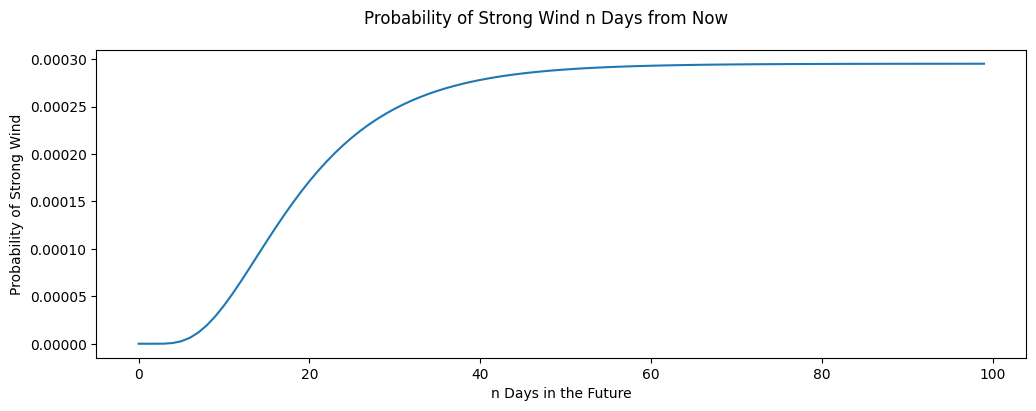

In [12]:
fig, ax = plt.subplots(1, figsize=(12,4))

plt.plot(all_hn)

ax.set_xlabel("n Days in the Future")
ax.set_ylabel("Probability of Strong Wind")
fig.suptitle("Probability of Strong Wind n Days from Now")

In [13]:
# Strong wind is impossible in the short term given today there is no wind. 
# Strong wind becomes more likely at around 20 days into the future. 
# After the inflection point, it seems like the asymptotic limit of Hn is around .0003. 
# Thus it seems like strong wind is very unlikely given a still day today.